<H1> <center> AI/ML intern </center> </H1>


### TASK LIST FOR 1 ST PHASE OF INTERNSHIP

### Build a Fake News Detection Model using Machine Learning


taking all the imports

In [6]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atmur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atmur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\atmur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

taking the datasets to the dataframes 

In [7]:
df1 = pd.read_csv("dataset/Fake.csv")
df2 = pd.read_csv("dataset/True.csv")

In [8]:
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


initializing the labels fake as 1 and true as 0 

In [10]:
df1["label"]=1
df2["label"]= 0

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [13]:
df1.drop(["title","subject","date"],axis=1,inplace=True)
df2.drop(["title","subject","date"],axis=1,inplace=True)

Mergeing the dataframes of Fake and True 

In [14]:
merged_df = pd.concat([df1,df2])
merged_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [15]:
merged_df.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
df = merged_df.sample(frac=1)

In [17]:
df.head()

,text,label
21764,After a recent speech given by Minister Louis ...,1
18419,Deputy Assistant to the President Sebastian Go...,1
19074,The fast food industry has been warning those ...,1
6693,BEIJING/TAIPEI (Reuters) - China warned on Wed...,0
15294,SO YOUR HUSBAND TURNS 69 If he s Bill Clinton ...,1


In [18]:
df.shape

(44898, 2)

Preprocess the data 

In [19]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
df["text"] = df["text"].apply(preprocess_text)

In [21]:
x = df['text']
y = df['label']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"xtrain - {x_train.shape} ,  ytrain - {y_train.shape},  xtest - {x_test.shape},   ytest - {y_test.shape}")

xtrain - (35918,) ,  ytrain - (35918,),  xtest - (8980,),   ytest - (8980,)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

Applying the ML models 

Accuracy: 0.9848552338530067
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4384
           1       0.99      0.98      0.99      4596

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



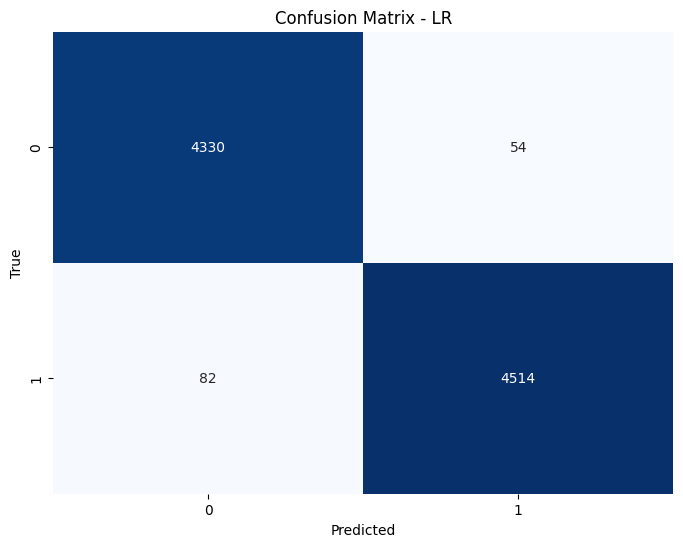

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lrmodel = LogisticRegression()

lrmodel.fit(x_train, y_train)

y_pred_lr = lrmodel.predict(x_test)



accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:")

print(classification_report(y_test, y_pred_lr))


cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=lrmodel.classes_, yticklabels=lrmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LR')
plt.show()

Accuracy: 0.9884187082405346
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4384
           1       0.99      0.99      0.99      4596

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



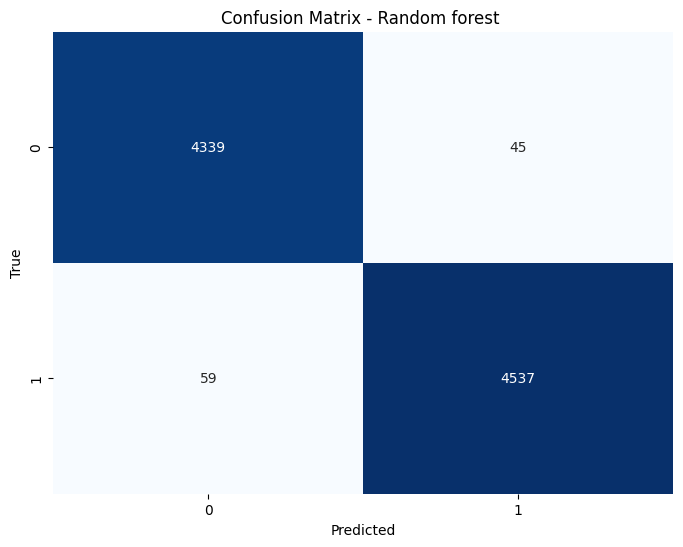

In [25]:
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

# Step 5: Evaluate classifier performance
y_pred = rfmodel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=rfmodel.classes_, yticklabels=rfmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random forest ')
plt.show()

Accuracy: 0.9959910913140312
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4384
           1       1.00      1.00      1.00      4596

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



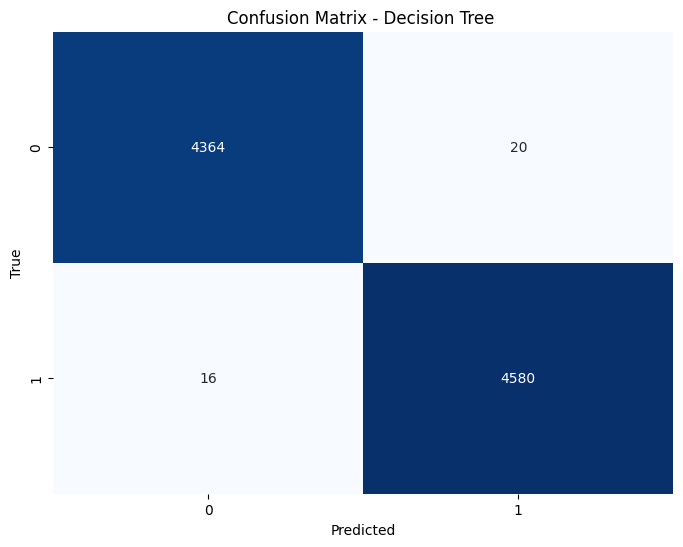

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()


dtmodel.fit(x_train, y_train)

# Step 5: Evaluate classifier performance
y_pred = dtmodel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=dtmodel.classes_, yticklabels=dtmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree ')
plt.show()

Accuracy: 0.994988864142539
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4384
           1       1.00      0.99      1.00      4596

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       1.00      0.99      0.99      8980



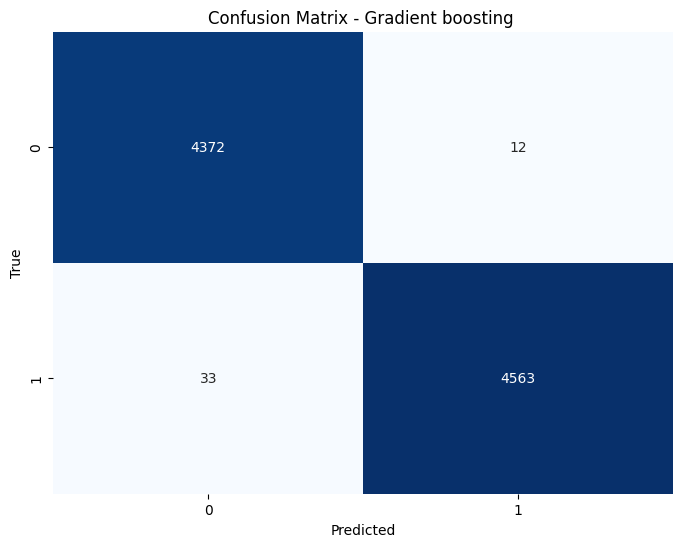

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbmodel = GradientBoostingClassifier(random_state = 0)
gbmodel.fit(x_train, y_train)

# Step 5: Evaluate classifier performance
y_pred = gbmodel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=gbmodel.classes_, yticklabels=gbmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient boosting ')
plt.show()

Testing the models

In [32]:
def output_lable(n):
    if n==1:
        return "Fake News"
    elif n==0:
        return "Not A Fake News -- Real News "
    
def testing(news):
    tnews = {"text":[news]}
    new_df_test = pd.DataFrame(tnews)
    new_df_test['text'] = new_df_test["text"].apply(preprocess_text) # Assuming wordopt is defined elsewhere
    new_x_test = new_df_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lrmodel.predict(new_xv_test)
    pred_DT = dtmodel.predict(new_xv_test)
    pred_GB = gbmodel.predict(new_xv_test)
    pred_RF = rfmodel.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

Checking Fake news 

In [33]:
news = str("Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local or state authorities for our assistance,” FEMA spokesperson Jeremy Edwards said in an email. The TikTok video, like other posts, goes on to relay baseless rumors of reported cases of Ebola, whose occasional outbreaks in humans primarily occur in Africa, at the festival. Some posts also shared an image made to appear that the CDC confirmed the supposed outbreak on X, the platform formerly known as Twitter. The purported X post from the agency reads, “Ebola outbreak confirmed at Black Rock City, NV. It is recommended that all Burning Man attendees remain in their dwellings until further notice. Current State of Emergency in progress.” But the CDC’s X account published no such post. “CDC has not received any reports of Ebola at the Burning Man Festival and has not issued any warnings or had any requests for assistance from the state and local health departments either,” agency spokesperson Scott Pauley said in an email. Reverse image searches further show that a graphic about Ebola used in the fictitious CDC post was published by the agency in 2016, but elements of it were changed. For example, the original graphic asks, “Recently in West Africa?” But the version used in the made-up X post asks, “Recently in Nevada?” Referencing more online rumors, Pauley also noted the CDC had not received reports of mpox, formerly known as monkeypox, or Marburg, a rare but severe hemorrhagic fever, in relation to Burning Man. A representative for the Burning Man Project organization also refuted the online claims. “Quite simply, the online rumors of transmissible illnesses in Black Rock City are unfounded and untrue,” Dominique Debucquoy-Dodley said in an email. The festival had been closed to vehicles after more than a half-inch (1.3 centimeters) of rain fell Sept. 1, causing flooding and foot-deep mud, as the AP reported. The annual gathering, which launched on a San Francisco beach in 1986, attracts nearly 80,000 artists, musicians and activists for a mix of wilderness camping and avant-garde performances") 
testing(news)



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


Checking Real news 

In [34]:
news = str("MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And that was one of the things we discussed.â€ ")
testing(news)



LR Predicition: Not A Fake News -- Real News  
DT Prediction: Not A Fake News -- Real News  
GBC Prediction: Not A Fake News -- Real News  
RFC Prediction:Not A Fake News -- Real News 
